# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

df = pd.read_csv('cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [9]:
# Load data
df = pd.read_csv('cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [10]:

num_duplicates = df.duplicated().sum()
print(num_duplicates)

720


In [11]:

df = df.drop_duplicates()
print(df.shape)

(11194, 15)


In [12]:

num_duplicates_after = df.duplicated().sum()
print(num_duplicates_after)

0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [13]:

null_counts = df.isna().sum().sort_values(ascending=False)
col_with_most_nulls = null_counts.index[0]
most_nulls = null_counts.iloc[0]
print(col_with_most_nulls, most_nulls)

Engine HP 69


In [14]:

print(len(df))

11194


In [15]:

df = df.dropna()

In [16]:

print(len(df))

11092


### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

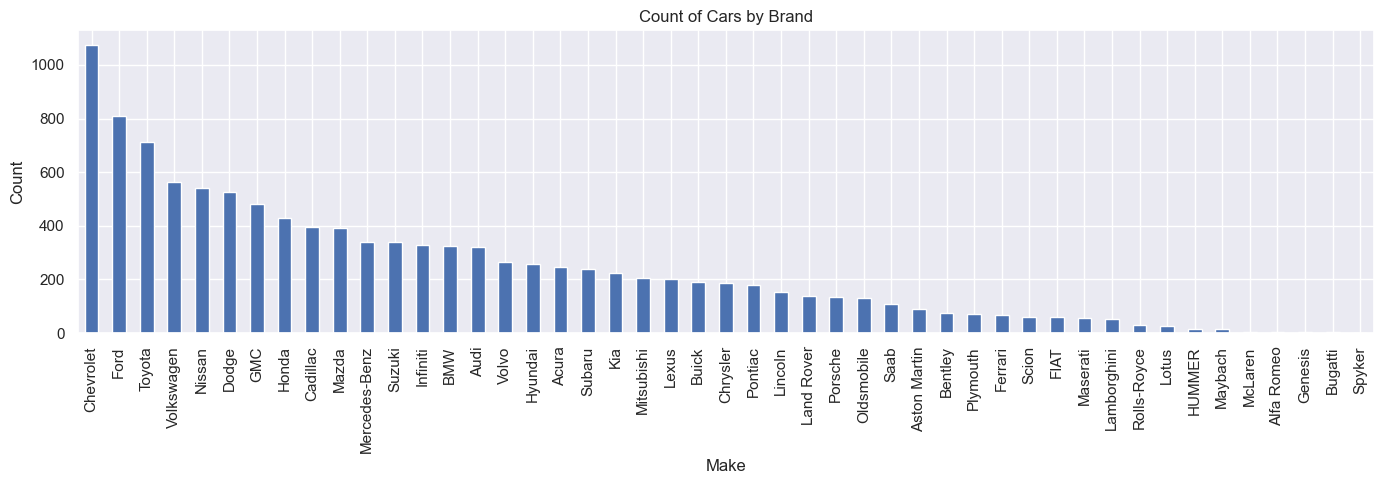

In [17]:

brand_counts = df['Make'].value_counts()
ax = brand_counts.plot(kind='bar', figsize=(14, 5))
ax.set_xlabel('Make')
ax.set_ylabel('Count')
ax.set_title('Count of Cars by Brand')
plt.tight_layout()

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

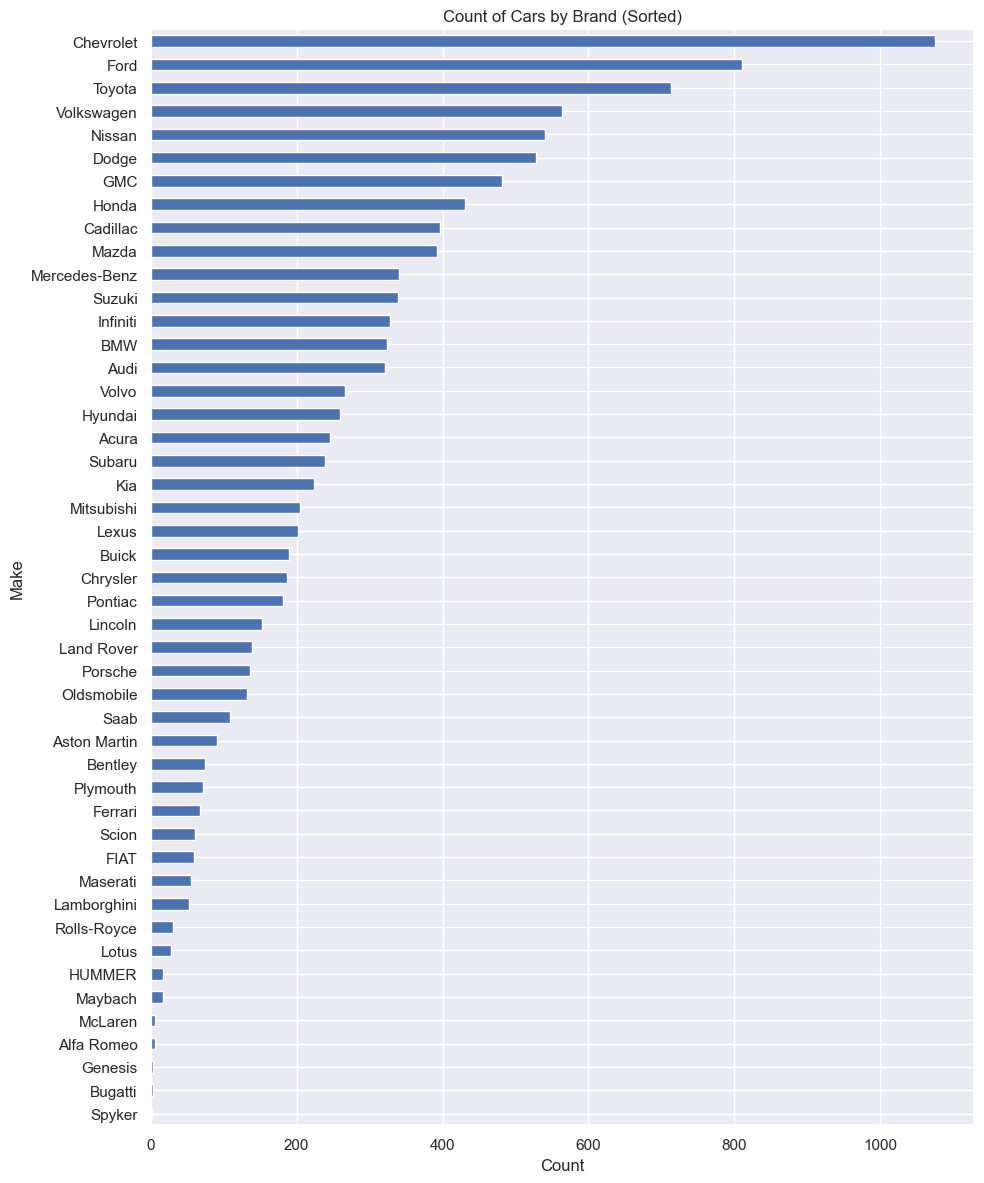

In [18]:

brand_counts_sorted = df['Make'].value_counts().sort_values(ascending=True)
ax = brand_counts_sorted.plot(kind='barh', figsize=(10, 12))
ax.set_xlabel('Count')
ax.set_ylabel('Make')
ax.set_title('Count of Cars by Brand (Sorted)')
plt.tight_layout()

# Make a timeline line chart in which the x-axis is the Year, and the y-axis is the mean MSRP.
* you're going to have to do a `groupby` for this one for sure. 
* What's noticeable about it and what do you think the error is...


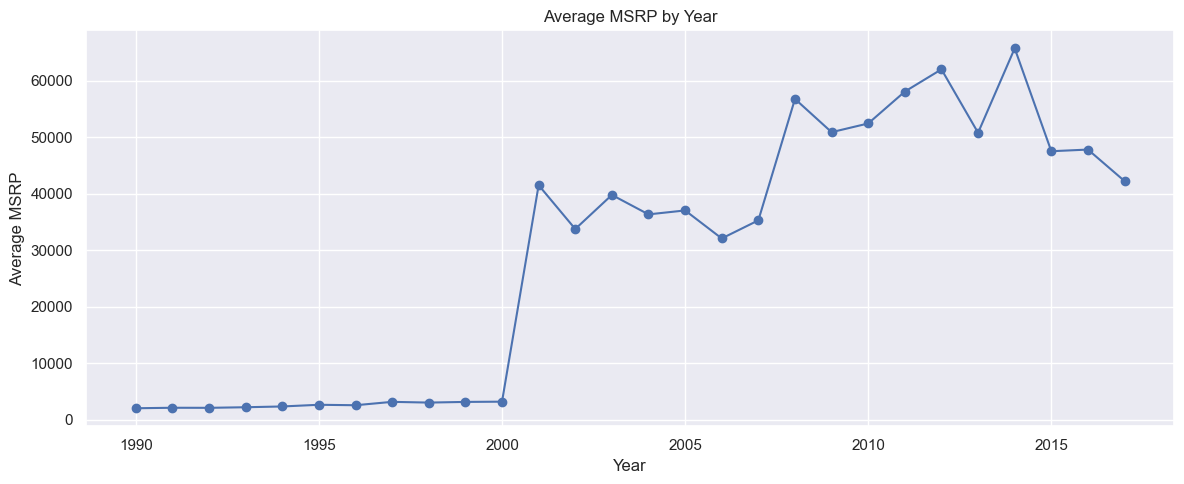

In [19]:

msrp_by_year = df.groupby('Year', as_index=True)['MSRP'].mean().sort_index()
ax = msrp_by_year.plot(kind='line', marker='o', figsize=(12,5))
ax.set_xlabel('Year')
ax.set_ylabel('Average MSRP')
ax.set_title('Average MSRP by Year')
plt.tight_layout()

# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [20]:

df['price_adjuster'] = np.where(df['Year'] <= 2000, 10, 1)

df['adjusted_price'] = df['MSRP'] * df['price_adjuster']

# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

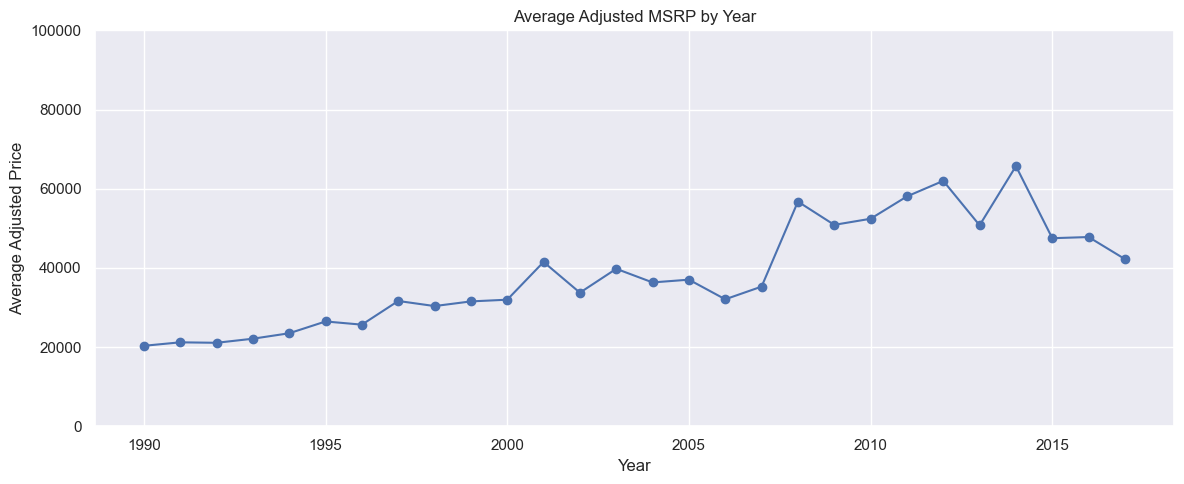

In [21]:

adj_by_year = df.groupby('Year', as_index=True)['adjusted_price'].mean().sort_index()
ax = adj_by_year.plot(kind='line', marker='o', figsize=(12,5))
ax.set_xlabel('Year')
ax.set_ylabel('Average Adjusted Price')
ax.set_title('Average Adjusted MSRP by Year')
ax.set_ylim(0, 100000)
plt.tight_layout()

# Plot the relationship between Engine HP and highway MPG

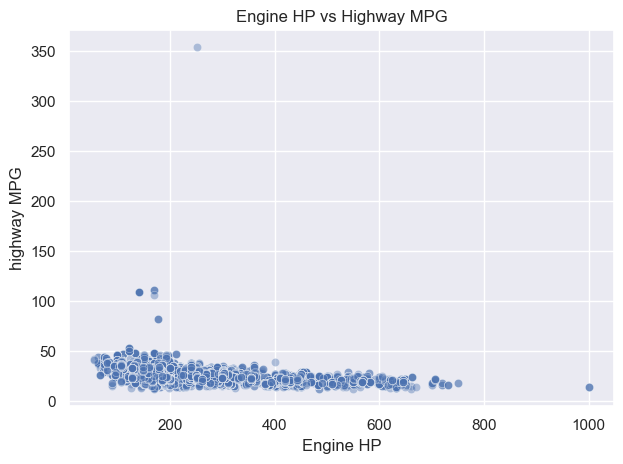

In [22]:

ax = sns.scatterplot(data=df, x='Engine HP', y='highway MPG', alpha=0.4)
ax.set_title('Engine HP vs Highway MPG')
plt.tight_layout()

In [23]:

hp_low, hp_high = df['Engine HP'].quantile([0.01, 0.99])
mpg_low, mpg_high = df['highway MPG'].quantile([0.01, 0.99])
df_no_outliers = df[(df['Engine HP'].between(hp_low, hp_high)) & (df['highway MPG'].between(mpg_low, mpg_high))]

# Replot the relationship between Engine HP and highway MPG


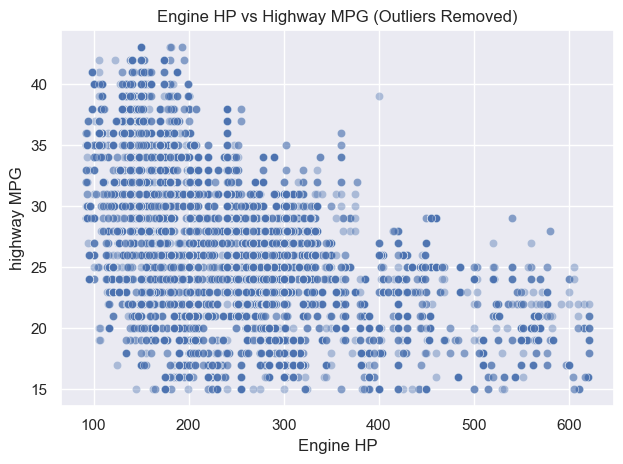

In [24]:

ax = sns.scatterplot(data=df_no_outliers, x='Engine HP', y='highway MPG', alpha=0.4)
ax.set_title('Engine HP vs Highway MPG (Outliers Removed)')
plt.tight_layout()

# Make a scatter plot of Engine HP vs highway MPG

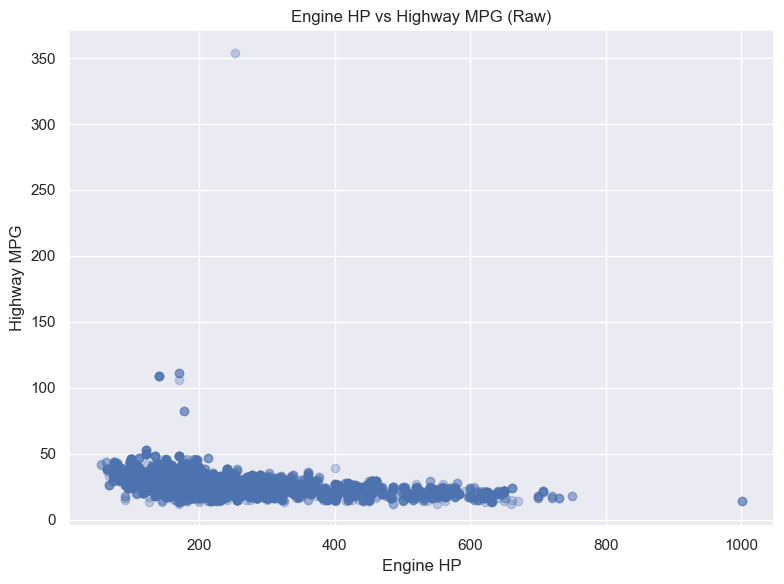

In [25]:

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df['Engine HP'], df['highway MPG'], alpha=0.3)
ax.set_xlabel('Engine HP')
ax.set_ylabel('Highway MPG')
ax.set_title('Engine HP vs Highway MPG (Raw)')
plt.tight_layout()

# What does this plot tell you about how Engine HP affects highway MPG?

In [26]:


print('As Engine HP increases, highway MPG generally decreases; higher power often correlates with lower fuel efficiency.')

As Engine HP increases, highway MPG generally decreases; higher power often correlates with lower fuel efficiency.


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

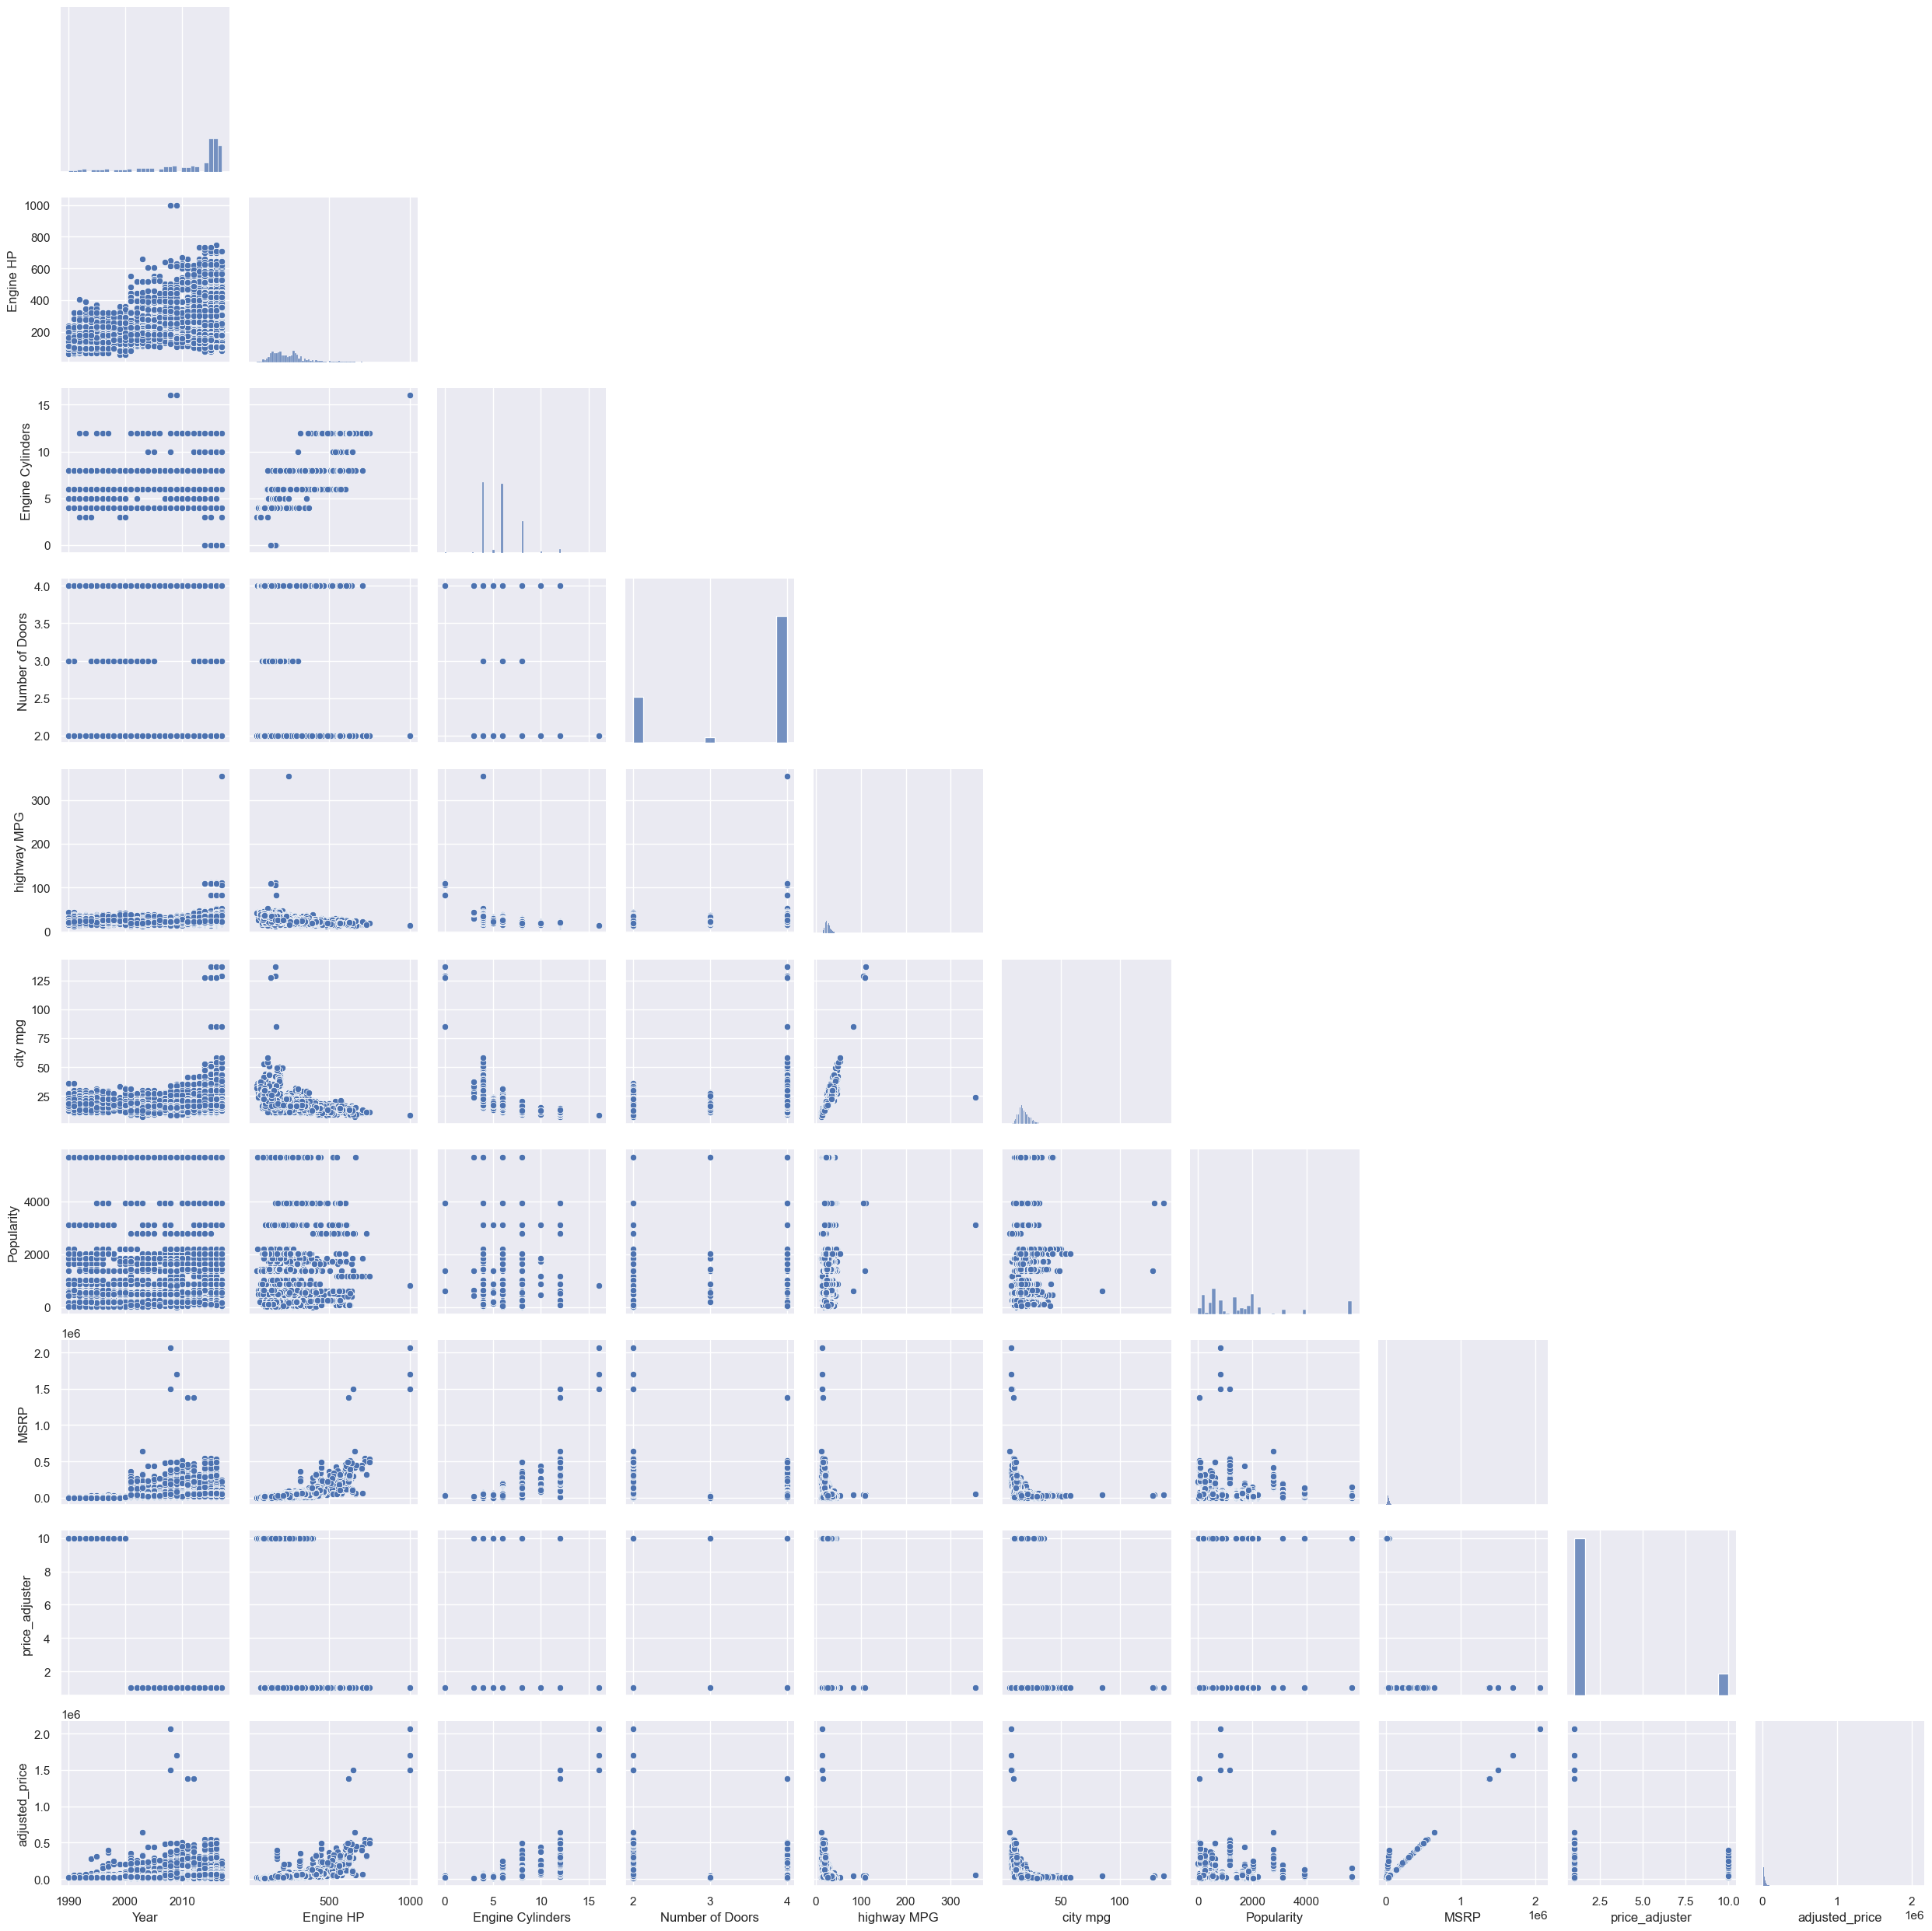

In [27]:

numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.pairplot(df[numeric_cols], diag_kind='hist', corner=True)
plt.tight_layout()

In [28]:

print('Engine HP and Engine Cylinders appear strongly related; also city mpg and highway MPG.')

Engine HP and Engine Cylinders appear strongly related; also city mpg and highway MPG.


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

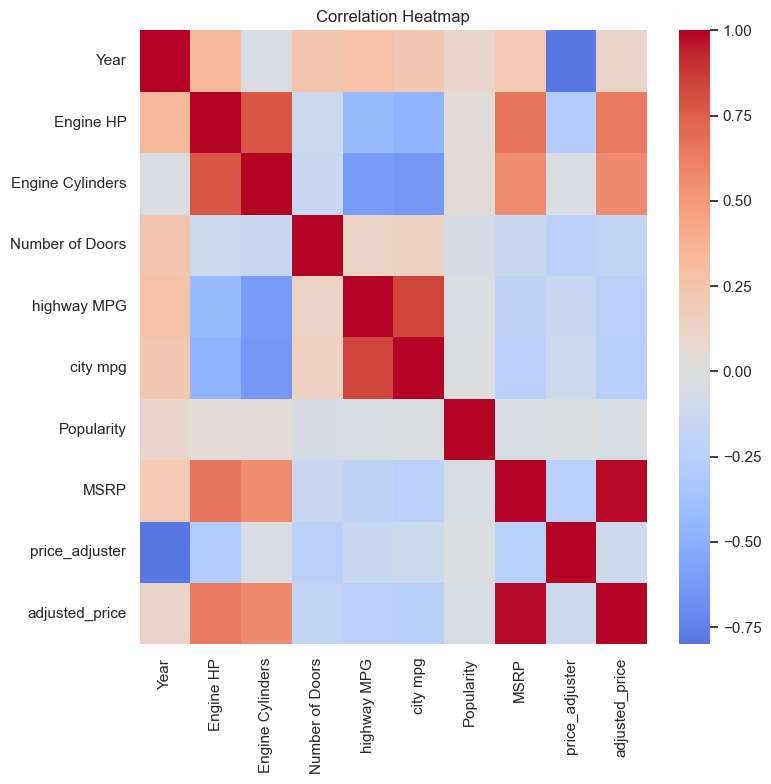

In [29]:

corr = df.select_dtypes(include=[np.number]).corr(numeric_only=True)
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()

In [30]:

print('Engine HP correlates most with Engine Cylinders; more cylinders typically indicate larger, more powerful engines.')

Engine HP correlates most with Engine Cylinders; more cylinders typically indicate larger, more powerful engines.


# [EXTRA CREDIT] 
* (EASY) In the column names, replace all the spaces with an underscore, and make them all lowercase as well.

* (Easy) Learn more about cleaning data by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_1.ipynb`.

* (Medium) Do the same vizualizations using bokeh by following along in TA Stevens tutorial in the TA-Tips folder named `SS-Tips.ipynb`.


* (Medium) Learn how to remove outliers properly by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_2.ipynb`.

* (Variable) Complete one or more of the [Extra-Extra credit](https://docs.google.com/document/d/1D99fY13cF3kzIiJILZ3fwzhOF73z_xPBNxxweMpBkOY/edit) items. 


